In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

sns.set_theme()

In [7]:
iris_dataset = datasets.load_iris()

In [8]:
df_iris = pd.DataFrame(data= np.concatenate((iris_dataset['data'],
                                           iris_dataset['target'].reshape(150, 1)), axis=1),
                     columns= iris_dataset['feature_names'] + ['target'])


In [9]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
df_iris.drop(columns='target').describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df_iris.isna().sum().sum()

0

In [12]:
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length',
                   'petal_width', 'target']

Text(0.5, 1.0, 'Target distribution')

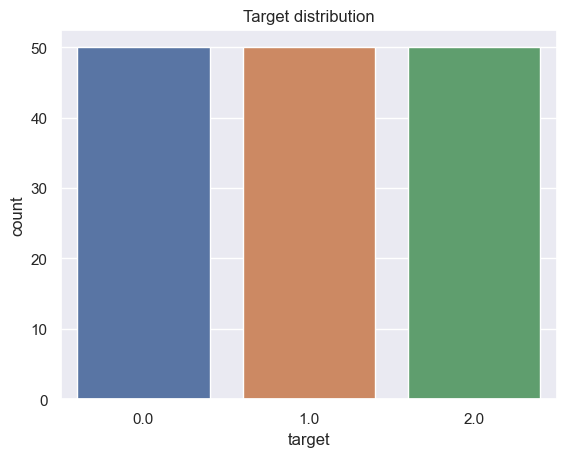

In [13]:
sns.countplot(x=df_iris['target'])
plt.title("Target distribution")

In [14]:
def plot_2d(x, y):
    plt.figure(figsize=(6, 4))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(df_iris[x], 
                df_iris[y], 
                c=df_iris['target'],
                cmap='viridis')
    plt.show()

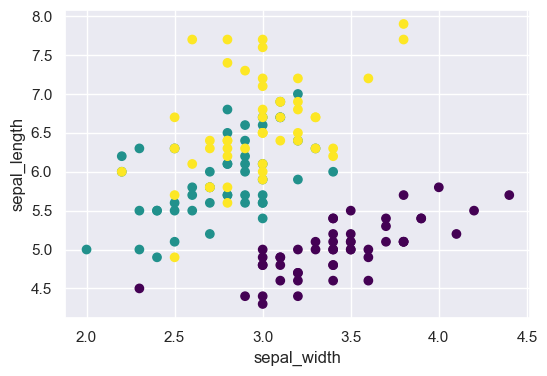

In [15]:
plot_2d('sepal_width', 'sepal_length')

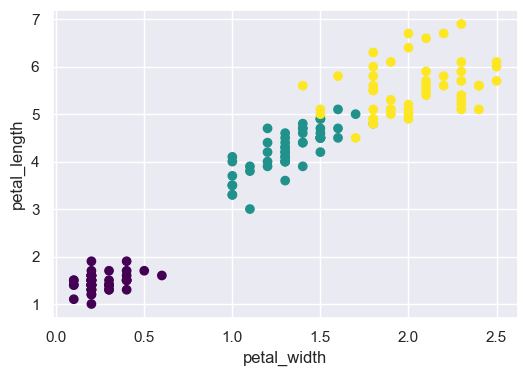

In [16]:
 plot_2d('petal_width', 'petal_length')

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

In [72]:
df_iris = df_iris.sample(frac=1).reset_index()
y = df_iris['target']
X = df_iris.drop(columns='target')

In [81]:
sf = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train_idx, test_idx) in enumerate(sf.split(X, y)):
    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_test, y_test = X.loc[test_idx], y.loc[test_idx]
    clf = GradientBoostingClassifier(n_estimators=10, 
                                     learning_rate=1.0,
                                     max_depth=1, 
                                     random_state=0).fit(X_train, y_train)
    
    print(f'Accuracy on the test score: {clf.score(X_test, y_test) * 100:.3f}%')
    

Accuracy on the test score: 100.000%
Accuracy on the test score: 100.000%
Accuracy on the test score: 96.667%
Accuracy on the test score: 96.667%
Accuracy on the test score: 100.000%


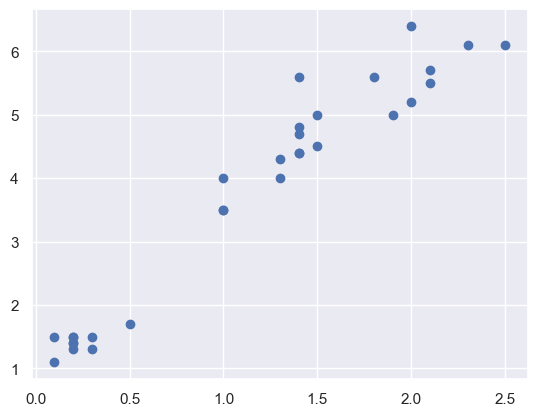

In [80]:
plt.scatter(X_test.petal_width, X_test.petal_length)